In [ ]:
import seaborn as sns
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from SHARED.params import *
from SHARED.display_trajectories import *
# matplotlib.use('Agg')
%matplotlib widget




In [ ]:



#Weather Data
results_path = "results/RL/Deterministic/agent_14/D_log.csv"

D_log = loadtxt(results_path, delimiter=',')

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)
plt.plot (D_log[:,0])
plt.title('Irradiance')
plt.ylabel("$W \cdot m^2$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,2)
plt.plot (D_log[:,1])
plt.title('C02')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,3)
plt.plot (D_log[:,2])
plt.title('Temperature')
plt.ylabel("$C^{\circ}$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,4)
plt.plot (D_log[:,3])
plt.title('Humidity')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")


plt.tight_layout()
plt.figlegend()
plt.show()

plt.savefig('figures/weather_data.eps', format='eps')


In [ ]:
agent_6_with_header = np.genfromtxt('results/RL/Deterministic/agent_6.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_9_with_header = np.genfromtxt('results/RL/Deterministic/agent_9.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_10_with_header = np.genfromtxt('results/RL/Deterministic/agent_10.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_14_with_header = np.genfromtxt('results/RL/Deterministic/agent_14.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_11_with_header = np.genfromtxt('results/RL/Deterministic/agent_11.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

plt.figure(figsize=(10,6))
plt.title('Cumulative Reward per training step')
# plt.subplot(1,2,1)
plt.plot(agent_6_with_header['Step'],agent_6_with_header['Value'], label = '$\gamma = 1$')
plt.plot(agent_9_with_header['Step'],agent_9_with_header['Value'], label = '$\gamma = 0.99$')
plt.plot(agent_14_with_header['Step'],agent_14_with_header['Value'], label = '$\gamma = 0.95$')
plt.plot(agent_10_with_header['Step'],agent_10_with_header['Value'], label = '$\gamma = 0.9$')
plt.grid()
plt.legend()
plt.ylabel("Cumulative Reward")
plt.xlabel("Step")
plt.savefig('figures/gamma_reward_training.eps', format='eps')

plt.figure(figsize=(10,6))
plt.title('Final Cumulative Reward')
cum_rewards = [agent_6_with_header['Value'][-1],agent_9_with_header['Value'][-1],agent_14_with_header['Value'][-1],agent_10_with_header['Value'][-1]]
discount_factor = ['1','0.99','0.95','0.9']
plt.plot(discount_factor,cum_rewards,marker='o')
plt.grid()
plt.ylabel("Cumulative Reward")
plt.xlabel("Discount Factor")
plt.savefig('figures/gamma_reward_final.eps', format='eps')


In [ ]:
agent_6_rewards              = loadtxt('results/RL/Deterministic/agent_6/rewards_log.csv', delimiter=',')
agent_6_values               = loadtxt('results/RL/Deterministic/agent_6/vf_log.csv', delimiter=',')
agent_6_cost             = loadtxt('results/RL/Deterministic/agent_6/cost_log.csv', delimiter=',')

agent_9_rewards              = loadtxt('results/RL/Deterministic/agent_9/rewards_log.csv', delimiter=',')
agent_9_values               = loadtxt('results/RL/Deterministic/agent_9/vf_log.csv', delimiter=',')
agent_9_cost             = loadtxt('results/RL/Deterministic/agent_9/cost_log.csv', delimiter=',')

agent_10_rewards              = loadtxt('results/RL/Deterministic/agent_10/rewards_log.csv', delimiter=',')
agent_10_values               = loadtxt('results/RL/Deterministic/agent_10/vf_log.csv', delimiter=',')
agent_10_cost             = loadtxt('results/RL/Deterministic/agent_10/cost_log.csv', delimiter=',')

agent_14_rewards              = loadtxt('results/RL/Deterministic/agent_14/rewards_log.csv', delimiter=',')
agent_14_values               = loadtxt('results/RL/Deterministic/agent_14/vf_log.csv', delimiter=',')
agent_14_cost             = loadtxt('results/RL/Deterministic/agent_14/cost_log.csv', delimiter=',')

def actual_values(cost_log, gamma = 1):
    vf = []
    cum = 0
    for i,r in enumerate(reversed(cost_log)):
        cum += r
        vf.append(cum)
        cum *=gamma
    return vf[::-1]


agents_rewards = [agent_6_rewards, agent_9_rewards,  agent_14_rewards,agent_10_rewards]
agents_values = [agent_6_values, agent_9_values,  agent_14_values,agent_10_values,]
agents_actual_values = [actual_values(agent_6_cost, gamma = 1),actual_values(agent_9_cost, gamma = 0.99),actual_values(agent_14_cost, gamma = 0.95),actual_values(agent_10_cost,gamma = 0.9)]
gamma = [1,0.99,0.95,0.9]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data
for i, (rewards, values, act_values) in enumerate(zip(agents_rewards, agents_values,agents_actual_values)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax2 = ax.twinx() 
    
    ax2.plot(rewards,color = 'g', label='Cumulative Reward')
    ax2.set_ylabel("$Euro/m^2$")
    ax.plot(values, label="Predicted Value")
    # ax.plot(values + rewards[1:], label = 'Quality Measure')
    ax.plot(act_values, label = "Actual Value")
    ax.grid()
    ax.set_ylabel("$Euro/m^2$")
    ax.set_xlabel("Time step (k)")
    ax.set_title(f"$\gamma = ${gamma[i]}")

# Get handles and labels for the legend
handles, labels = axs[0, 0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add figlegend
fig.legend(handles+handles2, labels+labels2, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
# Display the plot
plt.show()

plt.savefig('figures/vf_vs_gamma.eps', format='eps')

In [ ]:
agent_1_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs/Y_log.csv', delimiter=',')
agent_1_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs/U_log.csv', delimiter=',')


agent_2_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/Y_log.csv', delimiter=',')
agent_2_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/U_log.csv', delimiter=',')

agent_3_outputs              = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/Y_log.csv', delimiter=',')
agent_3_inputs             = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/U_log.csv', delimiter=',')

fig, axs_y = plt.subplots(2,2, sharex=True, sharey=False, layout='constrained', figsize=(15, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("Drymass", "$kg \cdot m^{-2}$"), ("Indoor C02", "ppm"),
                                    ("Indoor Temperature", "$^{\circ}C$"), ("Indoor Humidity","%")]):
    ax = axs_y[i // 2, i % 2]
    # ax = axs_y[i]
    ax.set_title(title)
    ax.plot(agent_1_outputs[:,i],alpha = 0.8,     label = "Agent 1")
    ax.plot(agent_2_outputs[:,i],alpha = 0.4,     label = "Agent 2")
    ax.plot(agent_3_outputs[:,i],alpha = 0.4,     label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time step")
    # ax.legend()

axs_y[0,1].axhline(y=C02_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[0,1].axhline(y=C02_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

#Humidity Constrains
axs_y[1,1].axhline(y=HUM_MAX_CONSTRAIN,color = 'k' ,linestyle = '--')

#Temperature Constrains
axs_y[1,0].axhline(y=TEMP_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[1,0].axhline(y=TEMP_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

handles, labels = axs_y[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()
plt.savefig('figures/selected_policies_outputs.eps', format='eps')


fig, axs_u = plt.subplots(3,1, sharex=True, sharey=False, layout='constrained', figsize=(10, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("C02 Injection Rate", "$mg/(m^{2} \cdot s)$"), ("Ventilation Rate", "$mm/s$"),
                                            ("Heating Supply", "$W \cdot m^{-2}$")]):
    # ax = axs_y[i // 2, i % 2]
    ax = axs_u[i]
    ax.set_title(title)
    ax.plot(agent_1_inputs[:,i],alpha = 0.8,    label = "Agent 1")
    ax.plot(agent_2_inputs[:,i],alpha = 0.4,    label = "Agent 2")
    ax.plot(agent_3_inputs[:,i],alpha = 0.4,    label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    # ax.legend()
    
axs_u[0].axhline(y=u_max[0],color = 'k' ,linestyle = '--')
axs_u[1].axhline(y=u_max[1],color = 'k' ,linestyle = '--')
axs_u[2].axhline(y=u_max[2],color = 'k' ,linestyle = '--')

handles, labels = axs_u[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
plt.show()
plt.savefig('figures/selected_policies_inputs.eps', format='eps')

In [ ]:


# path = 'results/RL/Stochastic/0.05/scale_' + str(0.05)
path = 'results/RL/Stochastic/nominal/0.2_' + str(0)
# path = 'results/MPC/Stochastic/1_hr/scale_' + str(noise_scale)
print (path)
average_metrics(path)


In [ ]:
#mean
mean_agent_005 = [4.3432,4.24985,4.03077,3.2749]
mean_agent_01  = [4.21976,4.15714,4.03076,3.59688]
mean_agent_02 = [4.17827,4.16127,4.10644,3.88648]
mean_nominal = [4.2683,4.1143,3.79179,2.97292]

#variance
variance_agent_005 = [0,0.00015972,0.00143446,0.00572537]
variance_agent_01  = [0,0.000500268,0.000870857,0.0045832]
variance_agent_02 = [0,0.000144415,0.000389025,0.00230789]
variance_nominal = [0,0.000767577,0.00166026,0.00851586]

x = [0, 0.05, 0.1, 0.2]
# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, sharex=False,figsize=(10, 3),layout='constrained')

# Plotting the means
ax1.plot(x, mean_nominal,marker = '.', label='Nominal Agent')
ax1.plot(x, mean_agent_005, marker = '.', label='Agent 0.05')
ax1.plot(x, mean_agent_01, marker = '.',label='Agent 0.1')
ax1.plot(x, mean_agent_02, marker = '.',label='Agent 0.2')
ax1.set_ylabel('$Euro \cdot m^2 $')
ax1.set_title('Mean Cumulative Reward ')
ax1.set_xlabel('Uncertainty ($\%$)')
ax1.grid(True)

# Plotting the variances
ax2.plot(x, variance_nominal, marker = '.',label='Nominal Agent')
ax2.plot(x, variance_agent_005,marker = '.', label='Agent 0.05')
ax2.plot(x, variance_agent_01, marker = '.',label='Agent 0.1')
ax2.plot(x, variance_agent_02, marker = '.',label='Agent 0.2')
ax2.set_xlabel('Uncertainty ($\%$)')
ax2.set_ylabel('$(Euro \cdot m^2 )^2$')
ax2.set_title('Cumulative Reward Variance')
ax2.grid(True)

# Create a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25, hspace=0.4)
# plt.tight_layout()
plt.show()
plt.savefig('figures/stochastic_rl_policies.eps', format='eps')

/tmp/ipykernel_727579/341343115.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


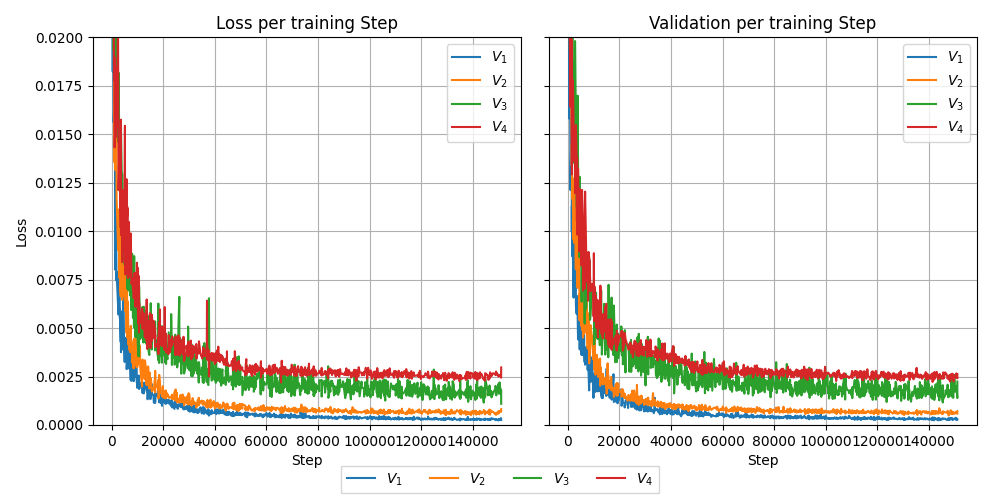

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [30]:
deep_full = np.genfromtxt('results/deep_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less = np.genfromtxt('results/deep_less.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced = np.genfromtxt('results/deep_reduced.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full = np.genfromtxt('results/shallow_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')


deep_full_val = np.genfromtxt('results/deep_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less_val = np.genfromtxt('results/deep_less_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced_val = np.genfromtxt('results/deep_reduced_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full_val = np.genfromtxt('results/shallow_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

fig, axs = plt.subplots(1,2, sharex=False, sharey=True, layout='constrained', figsize=(10, 5))
loss_ax = axs[0]
val_ax = axs[1]

loss_ax.plot(deep_full['Step'],deep_full['Value'], label = "$V_1$")
loss_ax.plot(deep_less['Step'],deep_less['Value'], label = "$V_2$")
loss_ax.plot(shallow_full['Step'],shallow_full['Value'], label = "$V_3$")
loss_ax.plot(deep_reduced['Step'],deep_reduced['Value'], label = "$V_4$")
loss_ax.grid()
loss_ax.legend()
loss_ax.set_ylim([0, 0.02])
loss_ax.set_ylabel("Loss")
loss_ax.set_xlabel("Step")
loss_ax.set_title('Loss')


val_ax.plot(deep_full_val['Step'],deep_full_val['Value'], label = "$V_1$")
val_ax.plot(deep_less_val['Step'],deep_less_val['Value'], label = "$V_2$")
val_ax.plot(shallow_full_val['Step'],shallow_full_val['Value'], label = "$V_3$")
val_ax.plot(deep_reduced_val['Step'],deep_reduced_val['Value'], label = "$V_4$")
val_ax.grid()
val_ax.legend()
val_ax.set_ylim([0, 0.02])
val_ax.set_xlabel("Step")
val_ax.set_title('Validation')



handles, labels = loss_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15, hspace=0.4)

plt.show()

plt.savefig('figures/tr_training_graphs.eps', format='eps')

In [31]:
from SHARED.vf_TR_class import *

'''Growth rate'''
max_growth = 0.5
min_growth = 0
growth_range = np.linspace(min_growth,max_growth,200)

env = greenhouseEnv()
env.random_starts = False
env.stochastic = False
env.using_mpc = False  
obs, _ =env.reset()

env_norm = greenhouseEnv(use_growth_dif=False)
env_norm = DummyVecEnv([lambda: env_norm])
env_norm = VecNormalize(env_norm, norm_obs = True, norm_reward = False, clip_obs = 10.,gamma=1)
env_norm = env_norm.load(env_path,env_norm)
env_norm.training = False

def vf_heatmap():
    vf_grid = np.zeros((len(growth_range),max_steps))
    for i in range(max_steps):
        for indx,growth in enumerate(growth_range):
            
            obs = np.array([0,1500,15,90,0.5,1,30,0,250,0.0009,10,0.006])
            obs[0] = growth
            obs[7] = i
            
            bounds_min = y1[i]*(1-0.8) - 0.01
            bounds_max = y1[i]*(1+0.7) + 0.1
            
            if growth < bounds_max and growth> bounds_min:
                obs_norm = env_norm.normalize_obs(obs)
                obs2store = obs_norm
                # obs2store = normalizeState(np.array([obs[0],obs[7]]),np.array([x_min[0],0]), np.array([x_max[0],max_steps]))
                value= my_vf.evaluate_value(obs2store)         
            else:
                value = None
            
            vf_grid[indx][i] = value
            
    mask = np.arange(len(growth_range)) % 10 == 0
    yticks = np.where(mask, np.round(growth_range*1000,3), None)

    ax = sns.heatmap(vf_grid, yticklabels=yticks)

    ax.invert_yaxis()  # Invert y-axis on the heatmap object
    plt.show()


vf_heatmap()

2024-05-25 18:23:29.147439: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 18:23:29.215718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 18:23:29.215753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 18:23:29.216526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 18:23:29.225700: I tensorflow/core/platform/cpu_feature_guar

NameError: name 'DummyVecEnv' is not defined